# FAANG Stock Analysis for 2020

## 0.1 Intent

##### The purpose of this project is to determine which FAANG stock was the most optimal to own based on risk v reward during the 2020 year

## 0.2 Import the dataset and preview

In [16]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn
import numpy as np

##### Here we define the FAANG stock tickers we will be using

In [2]:
stocks = ["AAPL", "GOOGL", "NFLX","FB","AMZN"]

In [3]:
data = yf.download(stocks, start = "2020-01-01", end = "2020-12-31")
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                    \
                 AAPL         AMZN          FB        GOOGL        NFLX   
Date                                                                      
2020-01-02  74.207466  1898.010010  209.779999  1368.680054  329.809998   
2020-01-03  73.486023  1874.969971  208.669998  1361.520020  325.899994   
2020-01-06  74.071579  1902.880005  212.600006  1397.810059  335.829987   
2020-01-07  73.723213  1906.859985  213.059998  1395.109985  330.750000   
2020-01-08  74.909149  1891.969971  215.220001  1405.040039  339.260010   

                Close                                                    ...  \
                 AAPL         AMZN          FB        GOOGL        NFLX  ...   
Date                                                                     ...   
2020-01-02  75.087502  1898.010010  209.779999  1368.680054  329.809998  ...   
2020-01-03  74.357498  1874.969971  208.669998  1361.520020  325.899994  ...   
2020-01-06  74.949997  1902.880005  212.600006  1397.810059  335.829987  ...   
2020-01-07  74.597504  1906.859985  213.059998  1395.109985  330.750000  ...   
2020-01-08  75.797501  1891.969971  215.220001  1405.040039  339.260010  ...   

                 Open                                                    \
                 AAPL         AMZN          FB        GOOGL        NFLX   
Date                                                                      
2020-01-02  74.059998  1875.000000  206.750000  1348.410034  326.100006   
2020-01-03  74.287498  1864.500000  207.210007  1348.000000  326.779999   
2020-01-06  73.447502  1860.000000  206.699997  1351.630005  323.119995   
2020-01-07  74.959999  1904.500000  212.820007  1400.459961  336.470001   
2020-01-08  74.290001  1898.040039  213.000000  1394.819946  331.489990   

               Volume                                       
                 AAPL     AMZN        FB    GOOGL     NFLX  
Date                                                        
2020-01-02  135480400  4029000  12077100  1363900  4485800  
2020-01-03  146322800  3764400  11188400  1170400  3806900  
2020-01-06  118387200  4061800  17058900  2338400  5663100  
2020-01-07  108872000  4044900  14912400  1716500  4703200  
2020-01-08  132079200  3508000  13475000  1765700  7104500  

[5 rows x 30 columns]

#####  We obtain the open price, close price, and volume for each trading day in the year
##### For analysis reasons, we will isolate the close price

In [4]:
closedstocks = data.loc[:, "Close"].copy()

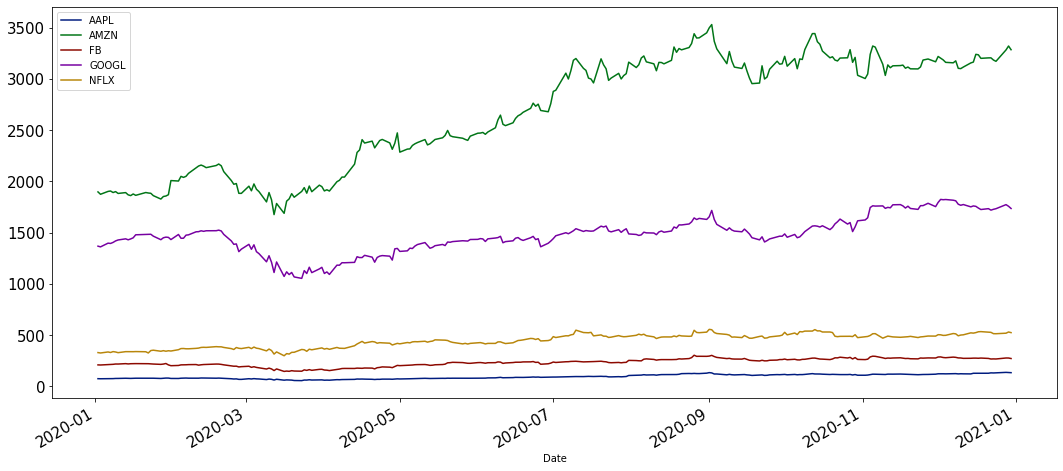

In [15]:
closedstocks.plot(figsize = (18, 8), fontsize = 15)
plt.style.use("seaborn-dark-palette")

##### The above chart may be misleading, since amazon stock costs the most, it appears as though it gained the most during the year.

##### We normalize the data by dividing the series by the first entry and multiplying by 100 to allow each stock the same starting point

In [7]:
norm = closedstocks.div(closedstocks.iloc[0]).mul(100)

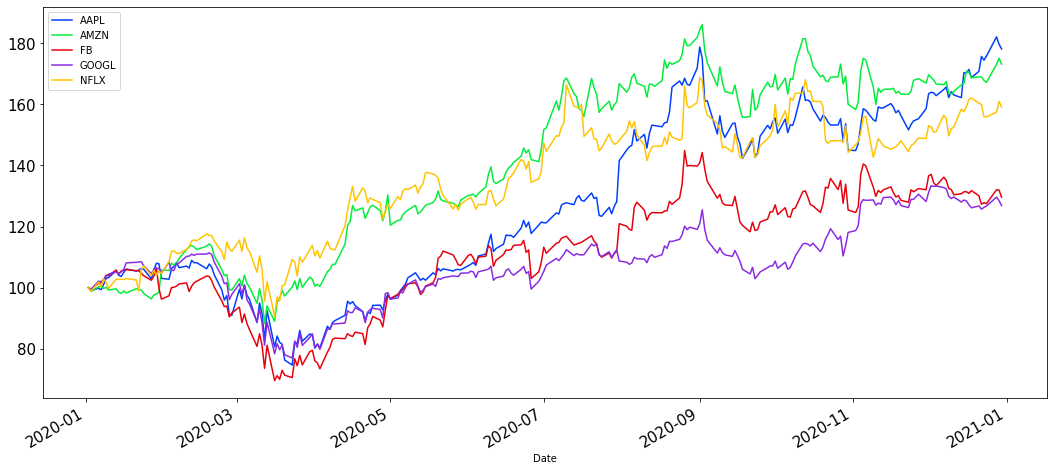

In [8]:
norm.plot(figsize = (18, 8), fontsize = 15)
plt.style.use("seaborn-dark-palette")

In [9]:
closedstocks.pct_change().head()

,AAPL,AMZN,FB,GOOGL,NFLX
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.005291,-0.005231,-0.011855
2020-01-06,0.007968,0.014886,0.018834,0.026654,0.030469
2020-01-07,-0.004703,0.002092,0.002164,-0.001932,-0.015127
2020-01-08,0.016086,-0.007809,0.010138,0.007118,0.025729


##### Below this text, we must drop all null values that could be due to weekends, holidays, ect..

##### We use the describe function to get an idea of the amount of entries, mean, standard deviation, and quartile ranges

In [10]:
closedall = closedstocks.pct_change().dropna()
closedall.describe()

,AAPL,AMZN,FB,GOOGL,NFLX
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.002735,0.002482,0.001454,0.001243,0.002274
std,0.029475,0.024298,0.028998,0.024285,0.029149
min,-0.128647,-0.079221,-0.142530,-0.116342,-0.111389
25%,-0.010608,-0.010535,-0.013279,-0.008239,-0.013428
50%,0.001749,0.002563,0.002164,0.003183,0.001122
75%,0.017181,0.014565,0.015424,0.013583,0.017609
max,0.119808,0.079295,0.102350,0.092411,0.116087


#####  We isolate the mean and standard deviation for each stock

In [11]:
sum = closedall.describe().T.loc[:, ["mean", "std"]]
sum

,mean,std
AAPL,0.002735,0.029475
AMZN,0.002482,0.024298
FB,0.001454,0.028998
GOOGL,0.001243,0.024285
NFLX,0.002274,0.029149


In [12]:
sum["mean"] = sum["mean"]*252
sum["std"] = sum["std"]* np.sqrt(252)

##### Using a scatterplot, we can determine the risk v reward for each stock by plotting the y-axis as "mean" and x-axis as "standard deviation"

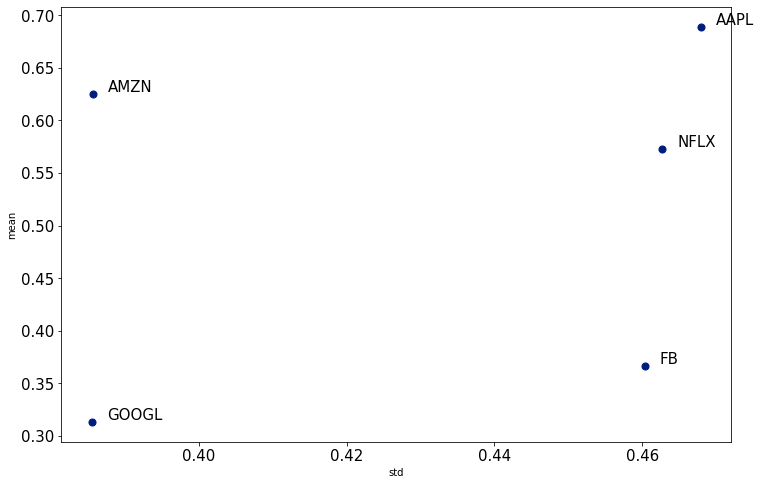

In [14]:
sum.plot.scatter(x= "std", y= "mean", figsize = (12,8), s=50, fontsize = 15)
for i in sum.index:
 plt.annotate(i, xy=(sum.loc[i, "std"]+0.002, sum.loc[i, "mean"]+0.002), size = 15)

## 0.3 Conclusion

##### Through these graphs, we can conclude that 
* Apple stock had the most reward, but also the most risk
* Google stock had the lowest reward, with an accompanying lowest risk
* Amazon appears to be the ideal stock to have owned in 2020 with a high reward compared to a significantly low risk.